In [1]:

import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import time
  
# reading features list
with open("kddcup.names", 'r') as f:
    print(f.read())

back,buffer_overflow,ftp_write,guess_passwd,imap,ipsweep,land,loadmodule,multihop,neptune,nmap,normal,perl,phf,pod,portsweep,rootkit,satan,smurf,spy,teardrop,warezclient,warezmaster.
duration: continuous.
protocol_type: symbolic.
service: symbolic.
flag: symbolic.
src_bytes: continuous.
dst_bytes: continuous.
land: symbolic.
wrong_fragment: continuous.
urgent: continuous.
hot: continuous.
num_failed_logins: continuous.
logged_in: symbolic.
num_compromised: continuous.
root_shell: continuous.
su_attempted: continuous.
num_root: continuous.
num_file_creations: continuous.
num_shells: continuous.
num_access_files: continuous.
num_outbound_cmds: continuous.
is_host_login: symbolic.
is_guest_login: symbolic.
count: continuous.
srv_count: continuous.
serror_rate: continuous.
srv_serror_rate: continuous.
rerror_rate: continuous.
srv_rerror_rate: continuous.
same_srv_rate: continuous.
diff_srv_rate: continuous.
srv_diff_host_rate: continuous.
dst_host_count: continuous.
dst_host_srv_count: con

In [2]:
cols="""duration,
protocol_type,
service,
flag,
src_bytes,
dst_bytes,
land,
wrong_fragment,
urgent,
hot,
num_failed_logins,
logged_in,
num_compromised,
root_shell,
su_attempted,
num_root,
num_file_creations,
num_shells,
num_access_files,
num_outbound_cmds,
is_host_login,
is_guest_login,
count,
srv_count,
serror_rate,
srv_serror_rate,
rerror_rate,
srv_rerror_rate,
same_srv_rate,
diff_srv_rate,
srv_diff_host_rate,
dst_host_count,
dst_host_srv_count,
dst_host_same_srv_rate,
dst_host_diff_srv_rate,
dst_host_same_src_port_rate,
dst_host_srv_diff_host_rate,
dst_host_serror_rate,
dst_host_srv_serror_rate,
dst_host_rerror_rate,
dst_host_srv_rerror_rate"""

columns=[]
for c in cols.split(','):
    if(c.strip()):
       columns.append(c.strip())

columns.append('target')
#print(columns)
print(len(columns))

42


In [3]:
with open("training_attack_types", 'r') as f:
    print(f.read())

back dos
buffer_overflow u2r
ftp_write r2l
guess_passwd r2l
imap r2l
ipsweep probe
land dos
loadmodule u2r
multihop r2l
neptune dos
nmap probe
perl u2r
phf r2l
pod dos
portsweep probe
rootkit u2r
satan probe
smurf dos
spy r2l
teardrop dos
warezclient r2l
warezmaster r2l




In [4]:
attacks_types = {
    'normal': 'normal',
'back': 'dos',
'buffer_overflow': 'u2r',
'ftp_write': 'r2l',
'guess_passwd': 'r2l',
'imap': 'r2l',
'ipsweep': 'probe',
'land': 'dos',
'loadmodule': 'u2r',
'multihop': 'r2l',
'neptune': 'dos',
'nmap': 'probe',
'perl': 'u2r',
'phf': 'r2l',
'pod': 'dos',
'portsweep': 'probe',
'rootkit': 'u2r',
'satan': 'probe',
'smurf': 'dos',
'spy': 'r2l',
'teardrop': 'dos',
'warezclient': 'r2l',
'warezmaster': 'r2l',
}

In [5]:
path = "kddcup_data_10_percent_corrected.csv"
df = pd.read_csv(path, names=columns)
df['Attack Type'] = np.where(df.target=='normal.', 0, 1)#df.target.apply(lambda r:attacks_types[r[:-1]])
df.head(10)


,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,...,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,target,Attack Type
0,0,tcp,http,SF,181,5450,0,0,0,0,...,1.0,0.0,0.11,0.00,0.0,0.0,0.0,0.0,normal.,0
1,0,tcp,http,SF,239,486,0,0,0,0,...,1.0,0.0,0.05,0.00,0.0,0.0,0.0,0.0,normal.,0
2,0,tcp,http,SF,235,1337,0,0,0,0,...,1.0,0.0,0.03,0.00,0.0,0.0,0.0,0.0,normal.,0
3,0,tcp,http,SF,219,1337,0,0,0,0,...,1.0,0.0,0.03,0.00,0.0,0.0,0.0,0.0,normal.,0
4,0,tcp,http,SF,217,2032,0,0,0,0,...,1.0,0.0,0.02,0.00,0.0,0.0,0.0,0.0,normal.,0
5,0,tcp,http,SF,217,2032,0,0,0,0,...,1.0,0.0,0.02,0.00,0.0,0.0,0.0,0.0,normal.,0
6,0,tcp,http,SF,212,1940,0,0,0,0,...,1.0,0.0,1.00,0.04,0.0,0.0,0.0,0.0,normal.,0
7,0,tcp,http,SF,159,4087,0,0,0,0,...,1.0,0.0,0.09,0.04,0.0,0.0,0.0,0.0,normal.,0
8,0,tcp,http,SF,210,151,0,0,0,0,...,1.0,0.0,0.12,0.04,0.0,0.0,0.0,0.0,normal.,0
9,0,tcp,http,SF,212,786,0,0,0,1,...,1.0,0.0,0.12,0.05,0.0,0.0,0.0,0.0,normal.,0


In [6]:
df["target"].value_counts()

smurf.              280790
neptune.            107201
normal.              97278
back.                 2203
satan.                1589
ipsweep.              1247
portsweep.            1040
warezclient.          1020
teardrop.              979
pod.                   264
nmap.                  231
guess_passwd.           53
buffer_overflow.        30
land.                   21
warezmaster.            20
imap.                   12
rootkit.                10
loadmodule.              9
ftp_write.               8
multihop.                7
phf.                     4
perl.                    3
spy.                     2
Name: target, dtype: int64

In [7]:
df.isnull().sum()

duration                       0
protocol_type                  0
service                        0
flag                           0
src_bytes                      0
dst_bytes                      0
land                           0
wrong_fragment                 0
urgent                         0
hot                            0
num_failed_logins              0
logged_in                      0
num_compromised                0
root_shell                     0
su_attempted                   0
num_root                       0
num_file_creations             0
num_shells                     0
num_access_files               0
num_outbound_cmds              0
is_host_login                  0
is_guest_login                 0
count                          0
srv_count                      0
serror_rate                    0
srv_serror_rate                0
rerror_rate                    0
srv_rerror_rate                0
same_srv_rate                  0
diff_srv_rate                  0
srv_diff_h

In [8]:
num_cols = df._get_numeric_data().columns
num_cols

Index(['duration', 'src_bytes', 'dst_bytes', 'land', 'wrong_fragment',
       'urgent', 'hot', 'num_failed_logins', 'logged_in', 'num_compromised',
       'root_shell', 'su_attempted', 'num_root', 'num_file_creations',
       'num_shells', 'num_access_files', 'num_outbound_cmds', 'is_host_login',
       'is_guest_login', 'count', 'srv_count', 'serror_rate',
       'srv_serror_rate', 'rerror_rate', 'srv_rerror_rate', 'same_srv_rate',
       'diff_srv_rate', 'srv_diff_host_rate', 'dst_host_count',
       'dst_host_srv_count', 'dst_host_same_srv_rate',
       'dst_host_diff_srv_rate', 'dst_host_same_src_port_rate',
       'dst_host_srv_diff_host_rate', 'dst_host_serror_rate',
       'dst_host_srv_serror_rate', 'dst_host_rerror_rate',
       'dst_host_srv_rerror_rate', 'Attack Type'],
      dtype='object')

In [9]:
num_cols = df._get_numeric_data().columns

cate_cols = list(set(df.columns)-set(num_cols))
cate_cols.remove('target')
#cate_cols.remove('Attack Type')

cate_cols

['service', 'flag', 'protocol_type']

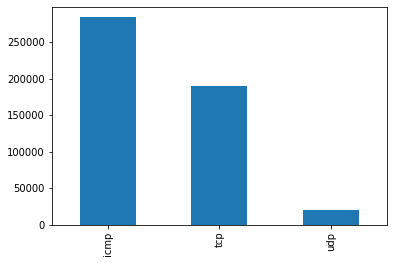

In [10]:
def bar_graph(feature):
    df[feature].value_counts().plot(kind="bar")
bar_graph('protocol_type')


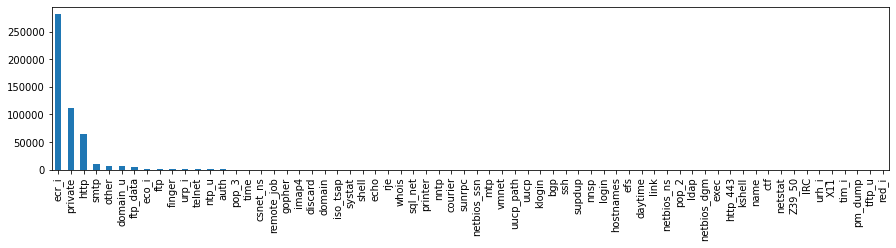

In [11]:
plt.figure(figsize=(15,3))
bar_graph('service')

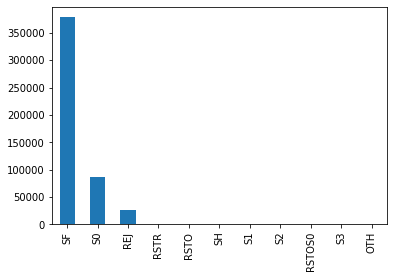

In [12]:
bar_graph('flag')

In [13]:
df.columns


Index(['duration', 'protocol_type', 'service', 'flag', 'src_bytes',
       'dst_bytes', 'land', 'wrong_fragment', 'urgent', 'hot',
       'num_failed_logins', 'logged_in', 'num_compromised', 'root_shell',
       'su_attempted', 'num_root', 'num_file_creations', 'num_shells',
       'num_access_files', 'num_outbound_cmds', 'is_host_login',
       'is_guest_login', 'count', 'srv_count', 'serror_rate',
       'srv_serror_rate', 'rerror_rate', 'srv_rerror_rate', 'same_srv_rate',
       'diff_srv_rate', 'srv_diff_host_rate', 'dst_host_count',
       'dst_host_srv_count', 'dst_host_same_srv_rate',
       'dst_host_diff_srv_rate', 'dst_host_same_src_port_rate',
       'dst_host_srv_diff_host_rate', 'dst_host_serror_rate',
       'dst_host_srv_serror_rate', 'dst_host_rerror_rate',
       'dst_host_srv_rerror_rate', 'target', 'Attack Type'],
      dtype='object')

In [14]:
df['Attack Type'].value_counts()

1    396743
0     97278
Name: Attack Type, dtype: int64

<ipython-input-15-31c74935275d>:1: FutureWarning: In a future version of pandas all arguments of DataFrame.dropna will be keyword-only.
  df = df.dropna('columns')# drop columns with NaN


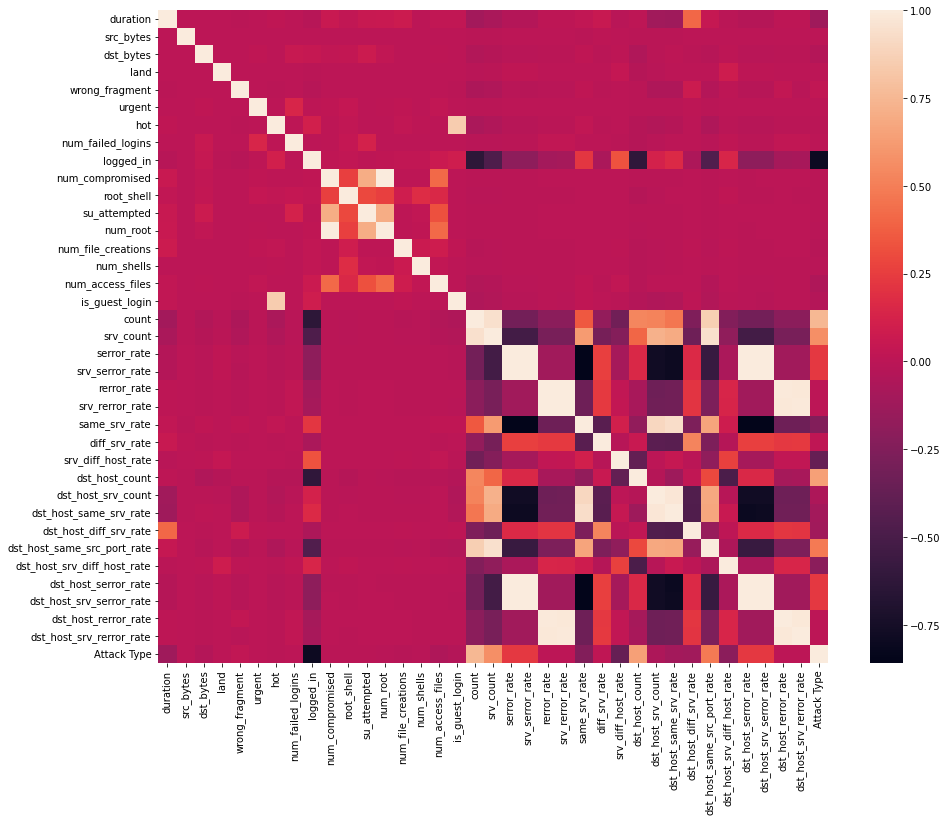

In [15]:
df = df.dropna('columns')# drop columns with NaN

df = df[[col for col in df if df[col].nunique() > 1]]# keep columns where there are more than 1 unique values

corr = df.corr()

plt.figure(figsize=(15,12))

sns.heatmap(corr)

plt.show()

In [16]:


# This variable is highly correlated with num_compromised and should be ignored for analysis.
#(Correlation = 0.9938277978738366)
df.drop('num_root', axis = 1, inplace = True)

# This variable is highly correlated with serror_rate and should be ignored for analysis.
#(Correlation = 0.9983615072725952)
df.drop('srv_serror_rate', axis = 1, inplace = True)

# This variable is highly correlated with rerror_rate and should be ignored for analysis.
#(Correlation = 0.9947309539817937)
df.drop('srv_rerror_rate', axis = 1, inplace = True)

# This variable is highly correlated with srv_serror_rate and should be ignored for analysis.
#(Correlation = 0.9993041091850098)
df.drop('dst_host_srv_serror_rate', axis = 1, inplace = True)

# This variable is highly correlated with rerror_rate and should be ignored for analysis.
#(Correlation = 0.9869947924956001)
df.drop('dst_host_serror_rate', axis = 1, inplace = True)

# This variable is highly correlated with srv_rerror_rate and should be ignored for analysis.
#(Correlation = 0.9821663427308375)
df.drop('dst_host_rerror_rate', axis = 1, inplace = True)

# This variable is highly correlated with rerror_rate and should be ignored for analysis.
#(Correlation = 0.9851995540751249)
df.drop('dst_host_srv_rerror_rate', axis = 1, inplace = True)

# This variable is highly correlated with srv_rerror_rate and should be ignored for analysis.
#(Correlation = 0.9865705438845669)
df.drop('dst_host_same_srv_rate', axis = 1, inplace = True)



In [17]:
df.head()

,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,...,same_srv_rate,diff_srv_rate,srv_diff_host_rate,dst_host_count,dst_host_srv_count,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,target,Attack Type
0,0,tcp,http,SF,181,5450,0,0,0,0,...,1.0,0.0,0.0,9,9,0.0,0.11,0.0,normal.,0
1,0,tcp,http,SF,239,486,0,0,0,0,...,1.0,0.0,0.0,19,19,0.0,0.05,0.0,normal.,0
2,0,tcp,http,SF,235,1337,0,0,0,0,...,1.0,0.0,0.0,29,29,0.0,0.03,0.0,normal.,0
3,0,tcp,http,SF,219,1337,0,0,0,0,...,1.0,0.0,0.0,39,39,0.0,0.03,0.0,normal.,0
4,0,tcp,http,SF,217,2032,0,0,0,0,...,1.0,0.0,0.0,49,49,0.0,0.02,0.0,normal.,0


In [18]:
df_std = df.std()
df_std = df_std.sort_values(ascending = True)
df_std

<ipython-input-18-2938f6df5f03>:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  df_std = df.std()


urgent                              0.005510
land                                0.006673
su_attempted                        0.007793
root_shell                          0.010551
num_shells                          0.011020
num_failed_logins                   0.015520
num_access_files                    0.036482
is_guest_login                      0.037211
dst_host_srv_diff_host_rate         0.042133
diff_srv_rate                       0.082205
num_file_creations                  0.096416
dst_host_diff_srv_rate              0.109259
wrong_fragment                      0.134805
srv_diff_host_rate                  0.142397
rerror_rate                         0.231623
logged_in                           0.355345
serror_rate                         0.380717
same_srv_rate                       0.388189
Attack Type                         0.397665
dst_host_same_src_port_rate         0.481309
hot                                 0.782103
num_compromised                     1.798326
dst_host_c

In [19]:
df['protocol_type'].value_counts()

icmp    283602
tcp     190065
udp      20354
Name: protocol_type, dtype: int64

In [20]:
#protocol_type feature mapping
pmap = {'icmp':0,'tcp':1,'udp':2}
df['protocol_type'] = df['protocol_type'].map(pmap)

In [21]:
df['flag'].value_counts()

SF        378440
S0         87007
REJ        26875
RSTR         903
RSTO         579
SH           107
S1            57
S2            24
RSTOS0        11
S3            10
OTH            8
Name: flag, dtype: int64

In [22]:
#flag feature mapping
fmap = {'SF':0,'S0':1,'REJ':2,'RSTR':3,'RSTO':4,'SH':5 ,'S1':6 ,'S2':7,'RSTOS0':8,'S3':9 ,'OTH':10}
df['flag'] = df['flag'].map(fmap)

In [23]:
df.head(n=5)

,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,...,same_srv_rate,diff_srv_rate,srv_diff_host_rate,dst_host_count,dst_host_srv_count,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,target,Attack Type
0,0,1,http,0,181,5450,0,0,0,0,...,1.0,0.0,0.0,9,9,0.0,0.11,0.0,normal.,0
1,0,1,http,0,239,486,0,0,0,0,...,1.0,0.0,0.0,19,19,0.0,0.05,0.0,normal.,0
2,0,1,http,0,235,1337,0,0,0,0,...,1.0,0.0,0.0,29,29,0.0,0.03,0.0,normal.,0
3,0,1,http,0,219,1337,0,0,0,0,...,1.0,0.0,0.0,39,39,0.0,0.03,0.0,normal.,0
4,0,1,http,0,217,2032,0,0,0,0,...,1.0,0.0,0.0,49,49,0.0,0.02,0.0,normal.,0


In [24]:
#df['flag'].unique()

In [25]:
#pd.concat([df, pd.get_dummies(df['flag'])], axis=1)

In [26]:
df.drop('service',axis = 1,inplace= True)

In [27]:
#Моделирование
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler

In [28]:
df = df.drop(['target',], axis=1)
print(df.shape)

# Target variable and train set
y = df[['Attack Type']]
X = df.drop(['Attack Type',], axis=1)

sc = MinMaxScaler()
X = sc.fit_transform(X)

# Split test and train data 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)
print(X_train.shape, X_test.shape)
print(y_train.shape, y_test.shape)

(494021, 31)
(330994, 30) (163027, 30)
(330994, 1) (163027, 1)


In [29]:
scores = {'Model': ['Naive_Bayes', 'Decision Tree', 'Logistic Regression'], 
          'Accuracy score': [],
          'Precision': [],
          'Recall': [],
          'F1-мера': [],
          'ROC AUC': []
         }

In [30]:
#sklearn.metrics
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
from sklearn.metrics import roc_auc_score, plot_roc_curve


In [31]:
print("Gaussian Naive Bayes:")

clfg = GaussianNB()
start_time = time.time()
clfg.fit(X_train, y_train.values.ravel())
end_time = time.time()
print("Training time: ", end_time-start_time)

start_time = time.time()
y_test_pred = clfg.predict(X_test)
end_time = time.time()
print("Testing time: ", end_time-start_time)


print("Train score is:", clfg.score(X_train, y_train))
print("Test score is:", clfg.score(X_test, y_test))
scores['Accuracy score'].append(clfg.score(X_test, y_test))
scores['Precision'].append(precision_score(y_test, y_test_pred))
scores['Recall'].append(recall_score(y_test, y_test_pred))
scores['F1-мера'].append(f1_score(y_test, y_test_pred))

y_pred_test_logits = clfg.predict_proba(X_test)[:, 1]
scores['ROC AUC'].append(roc_auc_score(y_test, y_pred_test_logits))
    

Gaussian Naive Bayes:
Training time:  0.2637813091278076
Testing time:  0.15775465965270996
Train score is: 0.9844619539931238
Test score is: 0.9839842480079987


#### Подбор оптимальной глубины дерева.

In [32]:
# Decision Tree 
from sklearn.tree import DecisionTreeClassifier

acc_train = []
acc_test = []
for i in range(1, 40):
    clfd = DecisionTreeClassifier(criterion ="entropy", max_depth = i)
    clfd.fit(X_train, y_train.values.ravel())
    y_train_pred = clfd.predict(X_train)
    y_test_pred = clfd.predict(X_test)
    acc_train.append(accuracy_score(y_train, y_train_pred))
    acc_test.append(accuracy_score(y_test, y_test_pred))


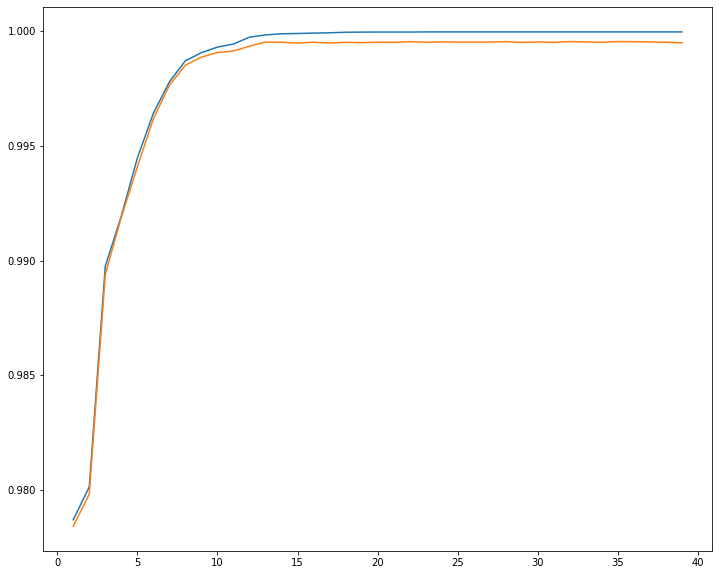

In [33]:
plt.figure(figsize=(12, 10))
plt.plot(list(range(1, 40)), acc_train)
plt.plot(list(range(1, 40)), acc_test)

In [34]:
acc_test

[0.9784084844841652,
 0.9798008918768056,
 0.9893882608402289,
 0.9918909137750188,
 0.99408073509296,
 0.9961846810650996,
 0.9976445619437271,
 0.9985278512148295,
 0.9988774865513075,
 0.9990799070092684,
 0.9991473804952554,
 0.9993559349064879,
 0.9995338195513627,
 0.9995276855980911,
 0.9994908818784618,
 0.9995276855980911,
 0.9994970158317334,
 0.9995215516448196,
 0.9995092837382765,
 0.9995276855980911,
 0.9995215516448196,
 0.9995522214111773,
 0.9995276855980911,
 0.9995399535046342,
 0.9995338195513627,
 0.9995338195513627,
 0.9995338195513627,
 0.9995522214111773,
 0.9995215516448196,
 0.9995399535046342,
 0.9995215516448196,
 0.9995583553644488,
 0.9995399535046342,
 0.9995276855980911,
 0.9995583553644488,
 0.9995522214111773,
 0.9995399535046342,
 0.9995276855980911,
 0.999503149785005]

#### Обучим на оптимальной глубине ~10

In [35]:

print("Decision Tree:")
clfd = DecisionTreeClassifier(criterion ="entropy", max_depth = 9)
start_time = time.time()
clfd.fit(X_train, y_train.values.ravel())
end_time = time.time()
print("Training time: ", end_time-start_time)
start_time = time.time()
y_test_pred = clfd.predict(X_test)
end_time = time.time()
print("Testing time: ", end_time-start_time)


print("Train score is:", clfd.score(X_train, y_train))
print("Test score is:", clfd.score(X_test, y_test))
scores['Accuracy score'].append(clfd.score(X_test, y_test))
scores['Precision'].append(precision_score(y_test, y_test_pred))
scores['Recall'].append(recall_score(y_test, y_test_pred))
scores['F1-мера'].append(f1_score(y_test, y_test_pred))

y_pred_test_logits = clfd.predict_proba(X_test)[:, 1]
scores['ROC AUC'].append(roc_auc_score(y_test, y_pred_test_logits))

Decision Tree:
Training time:  0.8455564975738525
Testing time:  0.034003257751464844
Train score is: 0.9990724907400134
Test score is: 0.9989020223643936


#### Самый важный признак

In [36]:
clfd.feature_importances_

array([6.09096215e-04, 5.18479931e-05, 3.90551334e-03, 3.89694112e-03,
       5.19083069e-02, 0.00000000e+00, 8.13951553e-03, 0.00000000e+00,
       4.12435041e-02, 4.08560938e-04, 2.78313637e-03, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 4.27433706e-05, 0.00000000e+00,
       1.17301380e-04, 0.00000000e+00, 8.54152504e-01, 9.86311679e-04,
       1.34510340e-02, 2.73917106e-04, 1.15697422e-04, 3.67929011e-04,
       0.00000000e+00, 6.09692622e-04, 2.93436387e-03, 1.63294110e-03,
       9.61472268e-03, 2.75441950e-03])

In [37]:
df.columns[clfd.feature_importances_.argmax()]

'count'

In [38]:
accuracy_score(y_test, y_test_pred)

0.9989020223643936

In [39]:
y_train_pred = clfd.predict(X_train)
accuracy_score(y_train, y_train_pred)

0.9990724907400134

In [40]:
from sklearn.linear_model import LogisticRegression
  
clfl = LogisticRegression(max_iter = 1200000)
start_time = time.time()
clfl.fit(X_train, y_train.values.ravel())
end_time = time.time()
print("Training time: ", end_time-start_time)

Training time:  7.74597692489624


In [41]:
print("Logistic Regression:")



start_time = time.time()
y_test_pred = clfl.predict(X_test)
end_time = time.time()
print("Testing time: ", end_time-start_time)


print("Train score is:", clfl.score(X_train, y_train))
print("Test score is:", clfl.score(X_test, y_test))
scores['Accuracy score'].append(clfl.score(X_test, y_test))
scores['Precision'].append(precision_score(y_test, y_test_pred))
scores['Recall'].append(recall_score(y_test, y_test_pred))
scores['F1-мера'].append(f1_score(y_test, y_test_pred))

y_pred_test_logits = clfl.predict_proba(X_test)[:, 1]
scores['ROC AUC'].append(roc_auc_score(y_test, y_pred_test_logits))

Logistic Regression:
Testing time:  0.016000986099243164
Train score is: 0.9926433711789338
Test score is: 0.9924981751489017


#### Confusion matrix - матрица ошибок

In [42]:
from sklearn.metrics import confusion_matrix

In [43]:
def plot_confusion_matrix(conf_mat, ax):
    sns.heatmap(conf_mat, annot=True, cmap= 'Blues', fmt='g', ax=ax, cbar=False)
    #ax.set_xlabel('Prediction')
    #ax.set_ylabel('True')
    plt.xlabel('Predictions', fontsize=18)
    plt.ylabel('True', fontsize=18)
    plt.title('Confusion Matrix', fontsize=18)
    #ax.set_title(sample)

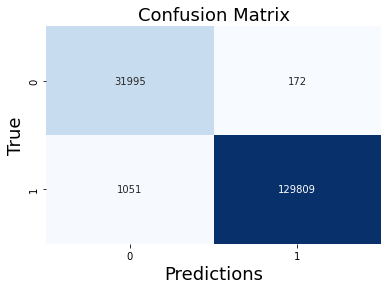

In [44]:
ax = plt.subplot()
plot_confusion_matrix(confusion_matrix(y_test, y_test_pred), ax=ax)


#### Precision - точность

In [45]:
precision_score(y_train, y_train_pred)

0.9999284676259534

In [46]:
precision_score(y_test, y_test_pred)

0.9986767296758757

#### Recall - полнота

In [47]:
#from sklearn.metrics import recall_score

In [48]:
recall_score(y_train, y_train_pred)

0.9989168167953574

In [49]:
#recall_score(y_test, y_test_pred)

#### F1 - мера

In [50]:
#from sklearn.metrics import f1_score

In [51]:
f1_score(y_test, y_test_pred)

0.9953113199228648

#### ROC AUC

In [52]:
#from sklearn.metrics import roc_auc_score, plot_roc_curve

In [53]:
y_pred_test_logits = clfl.predict_proba(X_test)[:, 1]

In [54]:
roc_auc_score(y_test, y_pred_test_logits)

0.9992598901211339

c:\Users\I513846\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function :func:`plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: :meth:`sklearn.metric.RocCurveDisplay.from_predictions` or :meth:`sklearn.metric.RocCurveDisplay.from_estimator`.
  warnings.warn(msg, category=FutureWarning)
c:\Users\I513846\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function :func:`plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: :meth:`sklearn.metric.RocCurveDisplay.from_predictions` or :meth:`sklearn.metric.RocCurveDisplay.from_estimator`.
  warnings.warn(msg, category=FutureWarning)
c:\Users\I513846\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_ro

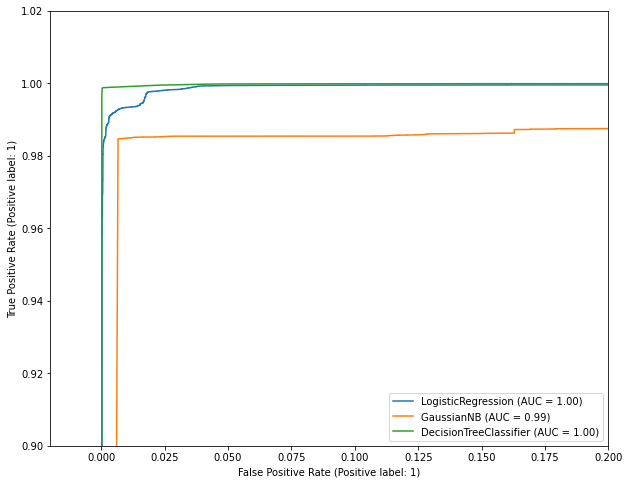

In [55]:
plt.rcParams["figure.figsize"] = (10,8)
#plt.figure(figsize=(8, 8))
ax = plt.subplot()
plot_roc_curve(clfl, X_test, y_test, ax=ax)
plot_roc_curve(clfg, X_test, y_test, ax=ax)
plot_roc_curve(clfd, X_test, y_test, ax=ax);
ax.set_ylim(0.9, 1.02)
ax.set_xlim(-0.02, 0.2);
plt.show()

In [56]:
print(scores)

{'Model': ['Naive_Bayes', 'Decision Tree', 'Logistic Regression'], 'Accuracy score': [0.9839842480079987, 0.9989020223643936, 0.9924981751489017], 'Precision': [0.9947763554855983, 0.9998699460658685, 0.9986767296758757], 'Recall': [0.9852208467064038, 0.9987620357634113, 0.991968515971267], 'F1-мера': [0.9899755435512912, 0.9993156838382874, 0.9953113199228648], 'ROC AUC': [0.9863683264589851, 0.9998045820888667, 0.9992598901211339]}


In [57]:
df_scores = pd.DataFrame(scores)
df_scores


,Model,Accuracy score,Precision,Recall,F1-мера,ROC AUC
0,Naive_Bayes,0.983984,0.994776,0.985221,0.989976,0.986368
1,Decision Tree,0.998902,0.999870,0.998762,0.999316,0.999805
2,Logistic Regression,0.992498,0.998677,0.991969,0.995311,0.999260


In [58]:
df_scores.sort_values('Accuracy score', ascending=False)

,Model,Accuracy score,Precision,Recall,F1-мера,ROC AUC
1,Decision Tree,0.998902,0.999870,0.998762,0.999316,0.999805
2,Logistic Regression,0.992498,0.998677,0.991969,0.995311,0.999260
0,Naive_Bayes,0.983984,0.994776,0.985221,0.989976,0.986368
